In [1]:
#  Import des bibliothèques
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Jeu de données : régression
# Exemple : Wine Quality, 2 attributs, 50 obs
df_wine = pd.read_csv("./data/wine+quality/winequality-red.csv", sep=';')
X = df_wine[['fixed acidity','volatile acidity']].head(50)
y = df_wine['quality'].head(50)

# Gradient et Hessienne MSE
y_pred, y_true = sp.symbols('y_pred y_true')
L = (y_pred - y_true)**2
grad = sp.diff(L, y_pred)
hess = sp.diff(grad, y_pred)
print("Gradient :", grad)
print("Hessienne :", hess)
# Convexité
print("MSE est convexe car Hessienne > 0")

Gradient : 2*y_pred - 2*y_true
Hessienne : 2


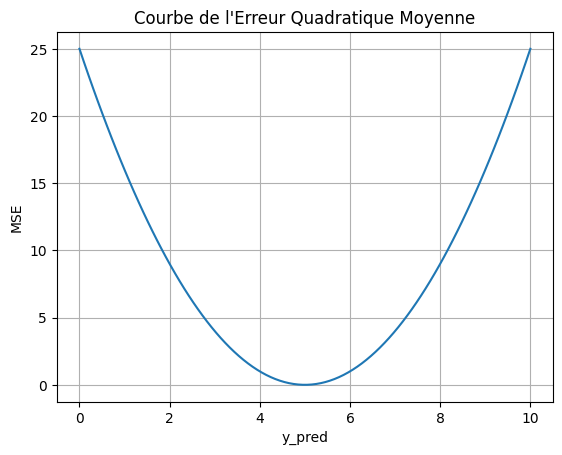

In [3]:
# Courbe de MSE
y_true_val = 5  # exemple
L_func = sp.lambdify(y_pred, L.subs(y_true, y_true_val), 'numpy')
y_pred_vals = np.linspace(y_true_val-5, y_true_val+5, 100)
plt.plot(y_pred_vals, L_func(y_pred_vals))
plt.xlabel('y_pred')
plt.ylabel('MSE')
plt.title('Courbe de l\'Erreur Quadratique Moyenne')
plt.grid(True)
plt.show()


In [4]:

# Tangente à une ellipse
x, y = sp.symbols('x y')
a, b = 2, 1
x0_val, y0_val = 1, 0.5
ellipse = x**2/a**2 + y**2/b**2 - 1
grad_ellipse = [sp.diff(ellipse, var) for var in (x,y)]
tangent_eq = grad_ellipse[0]*(x - x0_val) + grad_ellipse[1]*(y - y0_val)
print("Equation de la tangente :", tangent_eq)

Equation de la tangente : x*(x - 1)/2 + 2*y*(y - 0.5)
